# Cleaning Data in Python

## Chapter 4 - Record Linkage

### Comparing Strings

Minimum edit distance is a systematic way to identify how close two strings are.
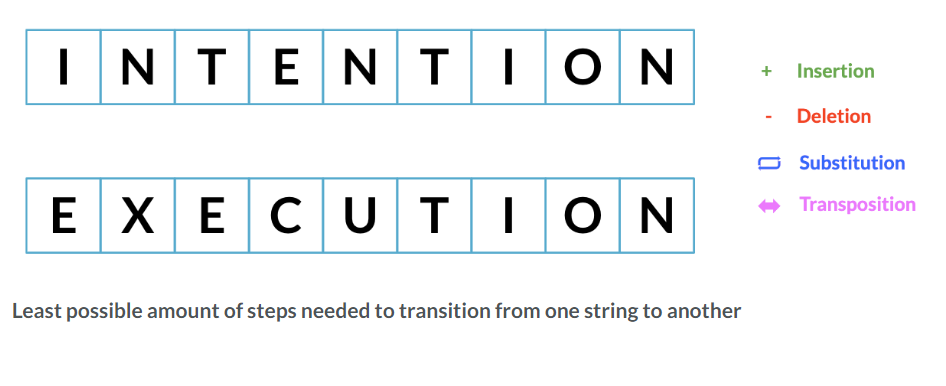

To get from Intention to Execution, start by deleting I from intention and adding C between E and N. The minimum edit distance so far is 2. The remaining steps are substitutions: N with E, T with X and N with U, 3 additional edit steps, taking the final minimum edit distance to 5 steps.

The closer two words are, the lower the minimum edit distance. 

There are a variety of algorithms based on edit distance that differ on which operations they use, how much weight is attributed to each operation and which type of string they are suited for and more. And there are a variety of packages that can be used. 
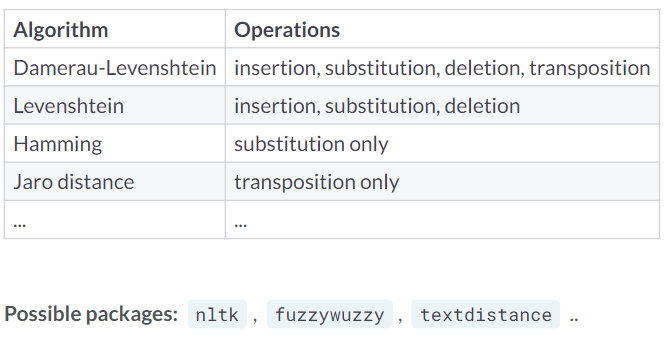

Levenshtein is the most general form of string matching and is used in the fuzzywuzzy package. To use the string comparison feature, import fuzz from the fuzzywuzzy package. Using the .WRatio() function, a comparison of the similarity of two text strings can be measured. The score provided will be from 0 to 100 with 0 being not similar at all and 100 being an exact match. This is not the same as the minimum edit distance, where a lower minimum edit distance meant a closer match. 

In [1]:
from fuzzywuzzy import fuzz

fuzz.WRatio('Reeding', 'Reading')

86

#### Partial Strings and Different Orderings

The .WRatio() function is highly robust when evaluating partial strings, as in the first example and different orderings, as in the second example below. 

In [2]:
fuzz.WRatio('Houston Rockets', 'Rockets')

90

In [3]:
fuzz.WRatio('Houston Rockets vs Los Angeles Lakers', 'Lakers vs Rockets')

86

#### Comparison with Arrays

By importing the process module from fuzzywuzzy, the .extract() function can be used to compare a string with an area of strings. .extract() takes in a string, an area of strings and a number of possible matches to return, ranked from highest to lowest. 

It returns a list of tuples with 3 elements:
>* The matching string being returned
>* The similarity score
>* The index in the area

In [2]:
import pandas as pd
import os
os.chdir('c:\\datacamp\\data\\')
from fuzzywuzzy import process

string = 'Houston Rockets vs Los Angeles Lakers'
choices = pd.Series(['Rockets vs Lakers', 'Lakers vs Rockets', 'Houston vs Los Angeles', 'Heat vs Bulls'])

process.extract(string, choices, limit = 2)

[('Rockets vs Lakers', 86, 0), ('Lakers vs Rockets', 86, 1)]

### Collapsing Categories with String Similarity

In Chapter 2 the .replace() method was used to collapse 'eur' into 'Europe'. But when there are multiple inconsistent categories of a single word, then a manual replacement is not feasible:
'EU', 'eur', 'Europ', 'Europa', 'Erope', 'Evropa'....

This can easily be done with string similarity. Say there is a DataFrame regarding a survey of the likelihood of moving, with the State field being a free form text field. Reconciling the variety of spellings can be accomplished with the .extract() function and comparing the free form field to the categories DataFrame that has the correct spelling for each category.

In [4]:
survey = pd.read_csv('movesurvey.csv')
print(survey)
categories = pd.DataFrame({'state':['California', 'New York']})
categories

           state   move_scores
0     California             1
1           Cali             1
2     Calefornia             1
3     Calefornie             3
4     Californie             0
5      Calfornia             2
6       New York             2
7  New York City             2


,state
0,California
1,New York


To collapse all the states, start with a for loop of the state in the categories['state']. For each state, the matches are found in the survey['state'] column, with the limit of matches set to the length of the survey DataFrame. 

Then, iterating over each potential match in another for loop, identifying the ones with a similarity score of greater than or equal to 80 with an if statement and for each of those returned strings, it is replaced with the correct state using the .loc method

In [11]:
for state in categories['state']:
    matches = process.extract(state, survey['state'], limit = survey.shape[0])
    
    for potential_match in matches:
        if potential_match[1] >=80:
            survey.loc[survey['state'] == potential_match[0], 'state'] = state

print(survey)            

        state   move_scores
0  California             1
1  California             1
2  California             1
3  California             3
4  California             0
5  California             2
6    New York             2
7    New York             2


### Exercise 1

####  The cutoff point
In this exercise, and throughout this chapter, you'll be working with the restaurants DataFrame which has data on various restaurants. Your ultimate goal is to create a restaurant recommendation engine, but you need to first clean your data.

This version of restaurants has been collected from many sources, where the cuisine_type column is riddled with typos, and should contain only italian, american and asian cuisine types. There are so many unique categories that remapping them manually isn't scalable, and it's best to use string similarity instead.

Before doing so, you want to establish the cutoff point for the similarity score using the fuzzywuzzy's process.extract() function by finding the similarity score of the most distant typo of each category.

__Instructions:__
* Import process from fuzzywuzzy.
* Store the unique cuisine_types into unique_types.
* Calculate the similarity of 'asian', 'american', and 'italian' to all possible cuisine_types using process.extract(), while returning all possible matches.

In [5]:
#load dataset needed for these exercises
restaurants = pd.read_csv('restaurants_dirty.csv')

# Import process from fuzzywuzzy
from fuzzywuzzy import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['cuisine_type'].unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', restaurants['cuisine_type'].unique(), limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', restaurants['cuisine_type'].unique(), limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', restaurants['cuisine_type'].unique(), limit = len(unique_types)))

print(unique_types)

[('asian', 100), ('asiane', 91), ('asiann', 91), ('asiian', 91), ('asiaan', 91), ('asianne', 83), ('asiat', 80), ('italiann', 72), ('italiano', 72), ('italianne', 72), ('italian', 67), ('amurican', 62), ('american', 62), ('italiaan', 62), ('italiian', 62), ('itallian', 62), ('americann', 57), ('americano', 57), ('ameerican', 57), ('aamerican', 57), ('ameriican', 57), ('amerrican', 57), ('ammericann', 54), ('ameerrican', 54), ('ammereican', 54), ('america', 50), ('merican', 50), ('murican', 50), ('italien', 50), ('americen', 46), ('americin', 46), ('amerycan', 46), ('itali', 40)]
[('american', 100), ('americann', 94), ('americano', 94), ('ameerican', 94), ('aamerican', 94), ('ameriican', 94), ('amerrican', 94), ('america', 93), ('merican', 93), ('ammericann', 89), ('ameerrican', 89), ('ammereican', 89), ('amurican', 88), ('americen', 88), ('americin', 88), ('amerycan', 88), ('murican', 80), ('asian', 62), ('asiane', 57), ('asiann', 57), ('asiian', 57), ('asiaan', 57), ('italian', 53), (

#### Remapping categories II
In the last exercise, you determined that the distance cutoff point for remapping typos of 'american', 'asian', and 'italian' cuisine types stored in the cuisine_type column should be 80.

In this exercise, you're going to put it all together by finding matches with similarity scores equal to or higher than 80 by using fuzywuzzy.process's extract() function, for each correct cuisine type, and replacing these matches with it. Remember, when comparing a string with an array of strings using process.extract(), the output is a list of tuples where each of tuple is as such:

(closest match, similarity score, index of match)
The restaurants DataFrame is in your environment, and you have access to a categories list containing the correct cuisine types.

__Instructions:__
* Iterate over each cuisine in the categories list.
* For each cuisine, find its similarity to entries in the cuisine_type column of restaurants, while returning all possible matches and store them in matches.
* For each possible match in matches equal or higher than 80, find the rows where the cuisine_type in restaurants is equal to that possible match.
* Replace that match with the correct cuisine, and print the new unique values of cuisine_type in restaurants.

In [6]:
categories = ['asian', 'american', 'italian']

# For each correct cuisine_type in categories
for cuisine in categories:
  # Find matches in cuisine_type of restaurants
  matches = process.extract(cuisine, restaurants['cuisine_type'], 
                            limit = restaurants.shape[0])
  
  # For each possible_match with similarity score >= 80
  for possible_match in matches:
    if possible_match[1] >= 80:
      # Find matching cuisine type
      matching_cuisine = restaurants['cuisine_type'] == possible_match[0]
      restaurants.loc[matching_cuisine, 'cuisine_type'] = cuisine

# Print unique values to confirm mapping
print(restaurants['cuisine_type'].unique())

['american' 'asian' 'italian']


### Generating Pairs

#### When Joins Won't Work

Looking at these two DataFrames below, scraped from two different web sites, there are events that are duplicates, with those having duplicate namings marked in red and non-duplicate names marked in green. Since there are no common unique identifiers between the DataFrames, games scheduled for the same time and the events are differently named, a regular join or merge will not work.
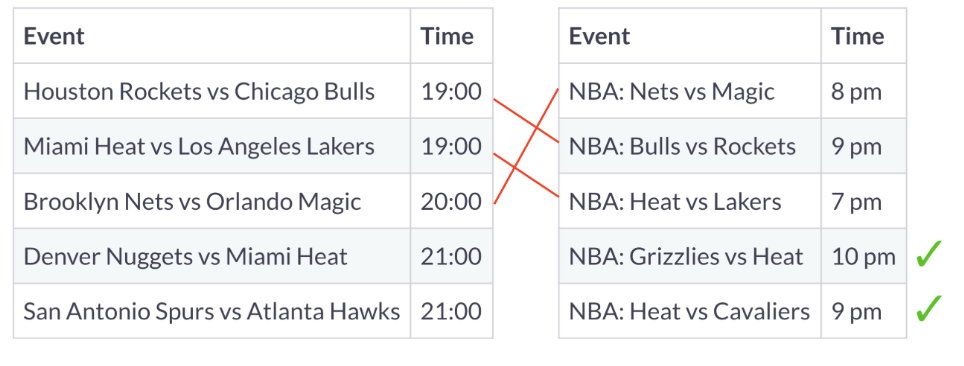

This is where record linkage comes in.

#### Record Linkage

Record linkage is the act of linking data from different sources regarding the same entity. Generally the steps are:
> Clean two or more DataFrames
> Generate pairs of potentially matching records
> Compare the pairs
> Score the pairs according to string similarity and other similarity metrics
> Link the data

All of these steps can be done with the recordlinkage package. An example is comparing census data on individuals throughout the states. The goal is to merge the datasets while avoiding duplication using record linkage since these datasets are collected manually and prone to typos and there are no consistent IDs between them. 
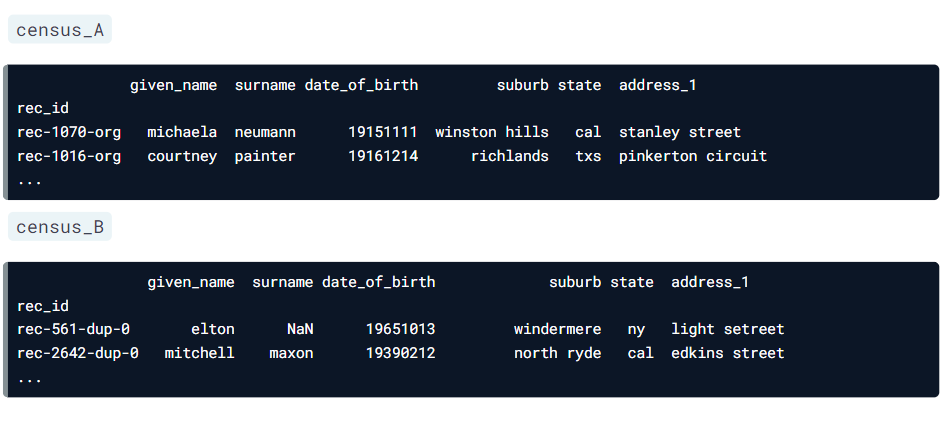

Ideally the pair generation creates all possible pairs, but with large DataFrames, that could result in generating millions or even billions of possible pairs which is not scalable and would hamper development time. 

##### Blocking

In that case, blocking is used to create pairs based on a matching column. In the case of census data, the blocking is done on the State field. To do this, the recordlinkage package is imported and the .Index() function of recordlinkage to create an indexing object which is object used to generate pairs for the DataFrames.

Using the .block() method against the indexing object and providing it the name of the column that will be used to block the data, in this case the 'state' column. Once the indexer object is initialized, pairs are generated using the .index() method which takes in the two DataFrames. 
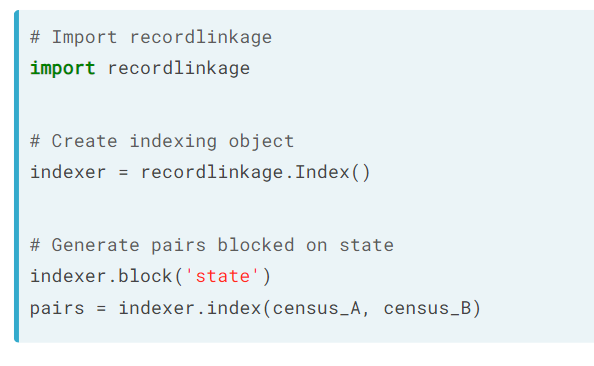

The resulting object is a Pandas multi-indexed object containing pairs of row indices from both DataFrames. Which is an array of possible pairs of indices that makes it much easier to subset DataFrames.
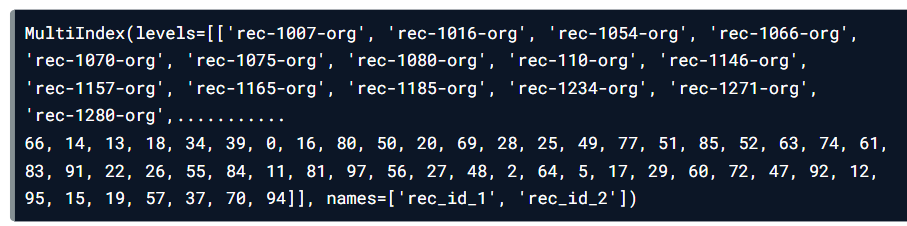

##### Comparing the DataFrames

With the pairs generated, next is to compare the potential matches. First step is to create a comparison object using the .Compare() function from the recordlinkage package. Similar to the index object, this comparison object is responsible for assigning different comparison procedures for pairs. 

For the columns where there must be exact matches between the pairs, the .exact() method is used on the comparison object, providing the names of the columns from each DataFrame and assigning a common column name in the resulting DataFrame. 

For the columns where strings need to meet a similarity threshold, the .string() method is used. It also takes in the column names from the DataFrames and the threshold = argument accepts a number between 0 and 1 and the label = argument assigns the common column name in the resulting DataFrame. 

The final step is to find the matches using the .compute() function which takes in the possible pairs and the names of the DataFrames. The same order for DataFrames must be used when generating pairs, comparing between columns and computing comparisons. 
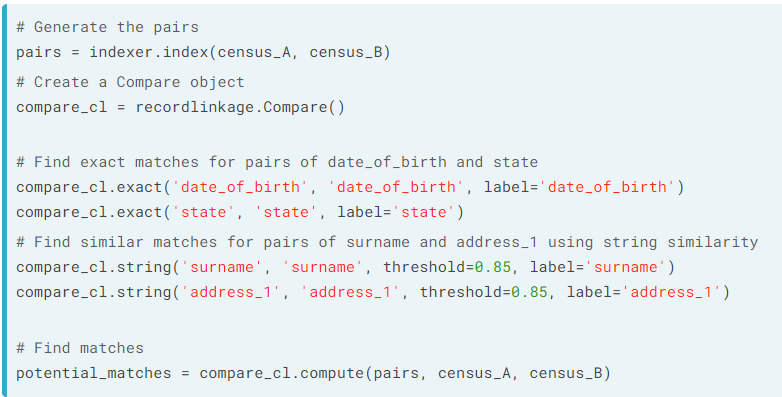

The output is a multi-indexed DataFrame where the first index is the row index of the first DataFrame and the second index is a list of all row indices in the second DataFrame. The columns are the columns being compared with 1 being and match an 0 being not a match. 
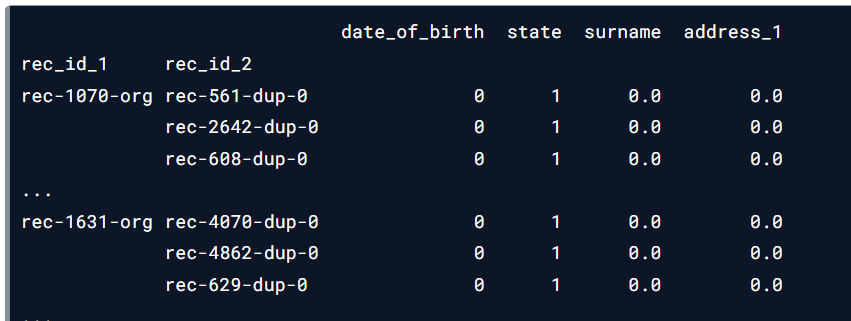

To find potential matches, filter for rows where the sum of row values is higher than a certain threshold. 
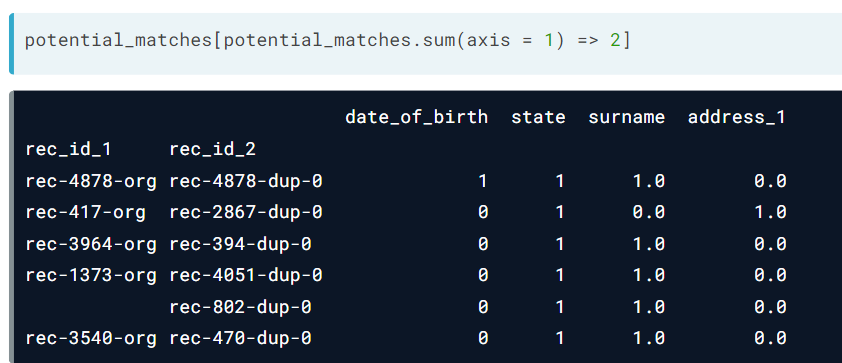

### Exercise 2

#### To link or not to link?
Similar to joins, record linkage is the act of linking data from different sources regarding the same entity. But unlike joins, record linkage does not require exact matches between different pairs of data, and instead can find close matches using string similarity. This is why record linkage is effective when there are no common unique keys between the data sources you can rely upon when linking data sources such as a unique identifier.

#### Pairs of restaurants
In the last lesson, you cleaned the restaurants dataset to make it ready for building a restaurants recommendation engine. You have a new DataFrame named restaurants_new with new restaurants to train your model on, that's been scraped from a new data source.

You've already cleaned the cuisine_type and city columns using the techniques learned throughout the course. However you saw duplicates with typos in restaurants names that require record linkage instead of joins with restaurants.

In this exercise, you will perform the first step in record linkage and generate possible pairs of rows between restaurants and restaurants_new. Both DataFrames, pandas and recordlinkage are in your environment.

__Instructions:__
* Instantiate an indexing object by using the Index() function from recordlinkage.
* Block your pairing on cuisine_type by using indexer's' .block() method.
* Generate pairs by indexing restaurants and restaurants_new in that order.


In [ ]:
#Load datasets for this exercise and import recordlinkage
import recordlinkage
restaurants = pd.read_csv('restaurants.csv')
restaurants_new = pd.read_csv('restaurants_new.csv')


# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block('cuisine_type')

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)

#### Similar restaurants
In the last exercise, you generated pairs between restaurants and restaurants_new in an effort to cleanly merge both DataFrames using record linkage.

When performing record linkage, there are different types of matching you can perform between different columns of your DataFrames, including exact matches, string similarities, and more.

Now that your pairs have been generated and stored in pairs, you will find exact matches in the city and cuisine_type columns between each pair, and similar strings for each pair in the rest_name column. Both DataFrames, pandas and recordlinkage are in your environment.

__Instructions:__
* Instantiate a comparison object using the recordlinkage.Compare() function.
* Use the appropriate comp_cl method to find exact matches between the city and cuisine_type columns of both DataFrames.
* Use the appropriate comp_cl method to find similar strings with a 0.8 similarity threshold in the rest_name column of both DataFrames.
* Use the appropriate comp_cl method to find exact matches between the city and cuisine_type columns of both DataFrames.
* Use the appropriate comp_cl method to find similar strings with a 0.8 similarity threshold in the rest_name column of both DataFrames.

In [ ]:
# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types - 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('cuisine_type', 'cuisine_type', label='cuisine_type')

# Find similar matches of rest_name
comp_cl.string('rest_name', 'rest_name', label='name', threshold = 0.8) 

# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
print(potential_matches)

#### Question
Print out potential_matches, the columns are the columns being compared, with values being 1 for a match, and 0 for not a match for each pair of rows in your DataFrames. To find potential matches, you need to find rows with more than matching value in a column. You can find them with

potential_matches[potential_matches.sum(axis = 1) >= n]
Where n is the minimum number of columns you want matching to ensure a proper duplicate find, what do you think should the value of n be?

__Possible Answers__<br>
3 because I need to have matches in all my columns.<br>
2 because matching on any of the 2 columns or more is enough to find potential duplicates.<br>
1 because matching on just 1 column like the restaurant name is enough to find potential duplicates.<br>

3 is correct. For this example, tightening your selection criteria will ensure good duplicate finds.

### Linking DataFrames

In the previous lessons pairs were generated from the census dataset, the pairs were compared and scored using recordlinkage.Compare(). The final step is to link the two datasets. The potential matches DataFrame is a multi-index DataFrame. The first indice is from census A data and the second indice is all possible indices from census B for each row index of census A. The columns are the columns selected to link both DataFrames, with values of 1 being a match and values of 0 not being a match. 

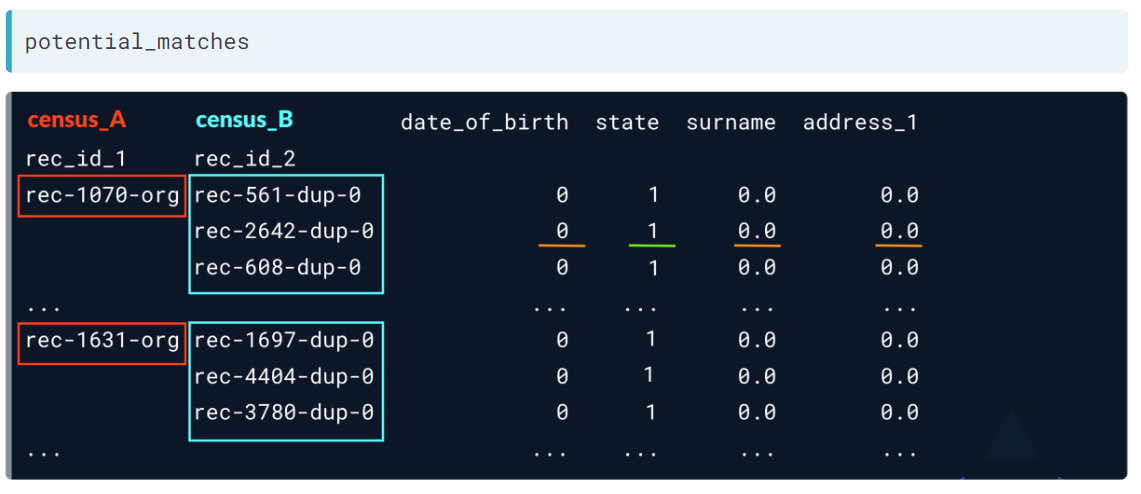

#### Probable Matches

The first step in linking DataFrames is to isolate potentially matching pairs by subsetting the rows where the row sum is above a threshold of a certain number of columns, in this case 3. The output is the row indices between census A and census B that are most likely duplicates. 

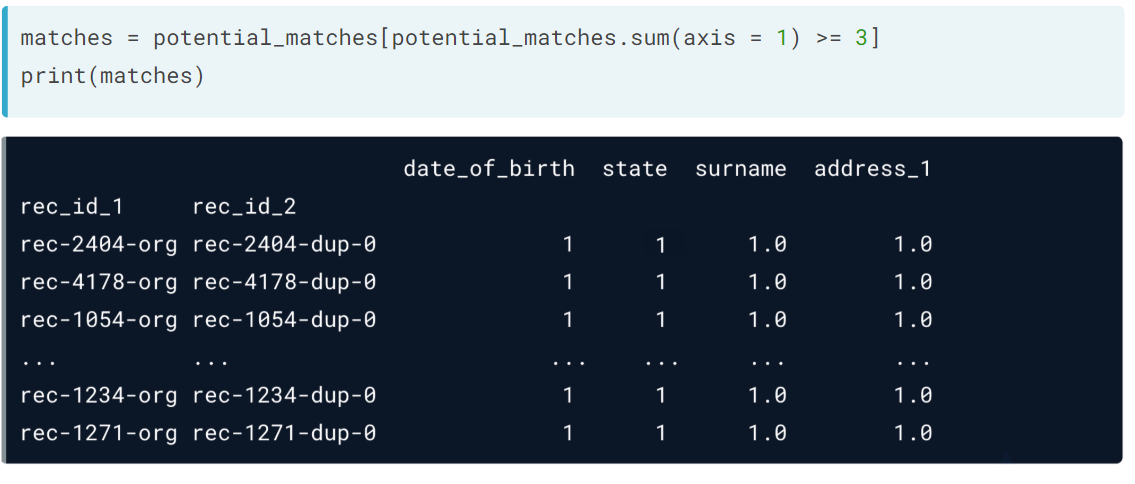

The next step is to subset one of index columns and subsetting its associated DataFrame to filter for duplicates. In this case the second index column is selected which represents row indices of census B. The objective is to extract those indices in census B and subset census B on them to remove duplicates with census A before appending them together.

#### Get the Indices

The DataFrame index is accessed using the .index attribute. Since this is a multi-index DataFrame, the output is a multi-index object containing pairs of row indices from census A and census B respectively. We want to extract all census B indices, so the .get_level_values() method is chained to the .index attribute which takes in which column index from which to extract the values.  1 is passed to the method to get the indices from the second DataFrame, in this case census B.

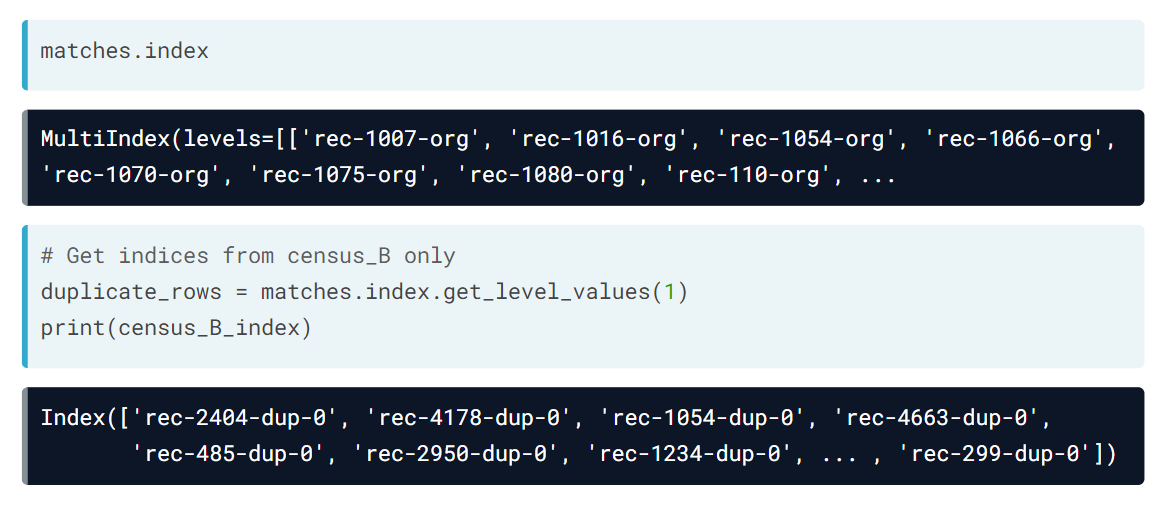

#### Linking DataFrames

To find the duplicates in census B, the census_B DataFrame is subsetted by the .index attribute, chained with the .isin() method that accepts the duplicate_rows DataFrame defined above. This will result in a new DataFrame of all the duplicate rows. By using the tilde on the subset, all the unique values will be extracted. With all the unique values extracted from the census_B DataFrame, the .append() method can be used to append census_A DataFrame with the unique values from census_B DataFrame. 

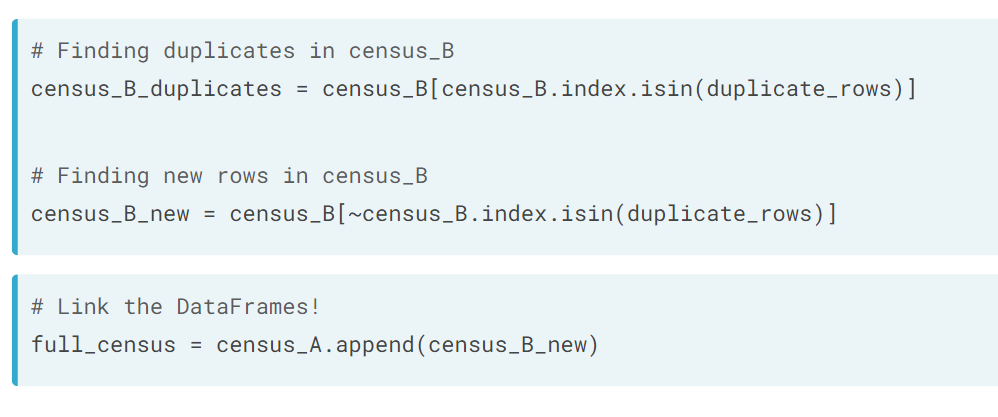
### Exercise 3

#### Linking them together!
In the last lesson, you've finished the bulk of the work on your effort to link restaurants and restaurants_new. You've generated the different pairs of potentially matching rows, searched for exact matches between the cuisine_type and city columns, but compared for similar strings in the rest_name column. You stored the DataFrame containing the scores in potential_matches.

Now it's finally time to link both DataFrames. You will do so by first extracting all row indices of restaurants_new that are matching across the columns mentioned above from potential_matches. Then you will subset restaurants_new on these indices, then append the non-duplicate values to restaurants. All DataFrames are in your environment, alongside pandas imported as pd.

__Instructions:__
* Isolate instances of potential_matches where the row sum is above or equal to 3 by using the .sum() method.
* Extract the second column index from matches, which represents row indices of matching record from restaurants_new by using the .get_level_values() method.
* Subset restaurants_new for rows that are not in matching_indices.
* Append non_dup to restaurants.

In [ ]:
# Isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis = 1) >= 3]

# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = restaurants.append(non_dup)
print(full_restaurants)